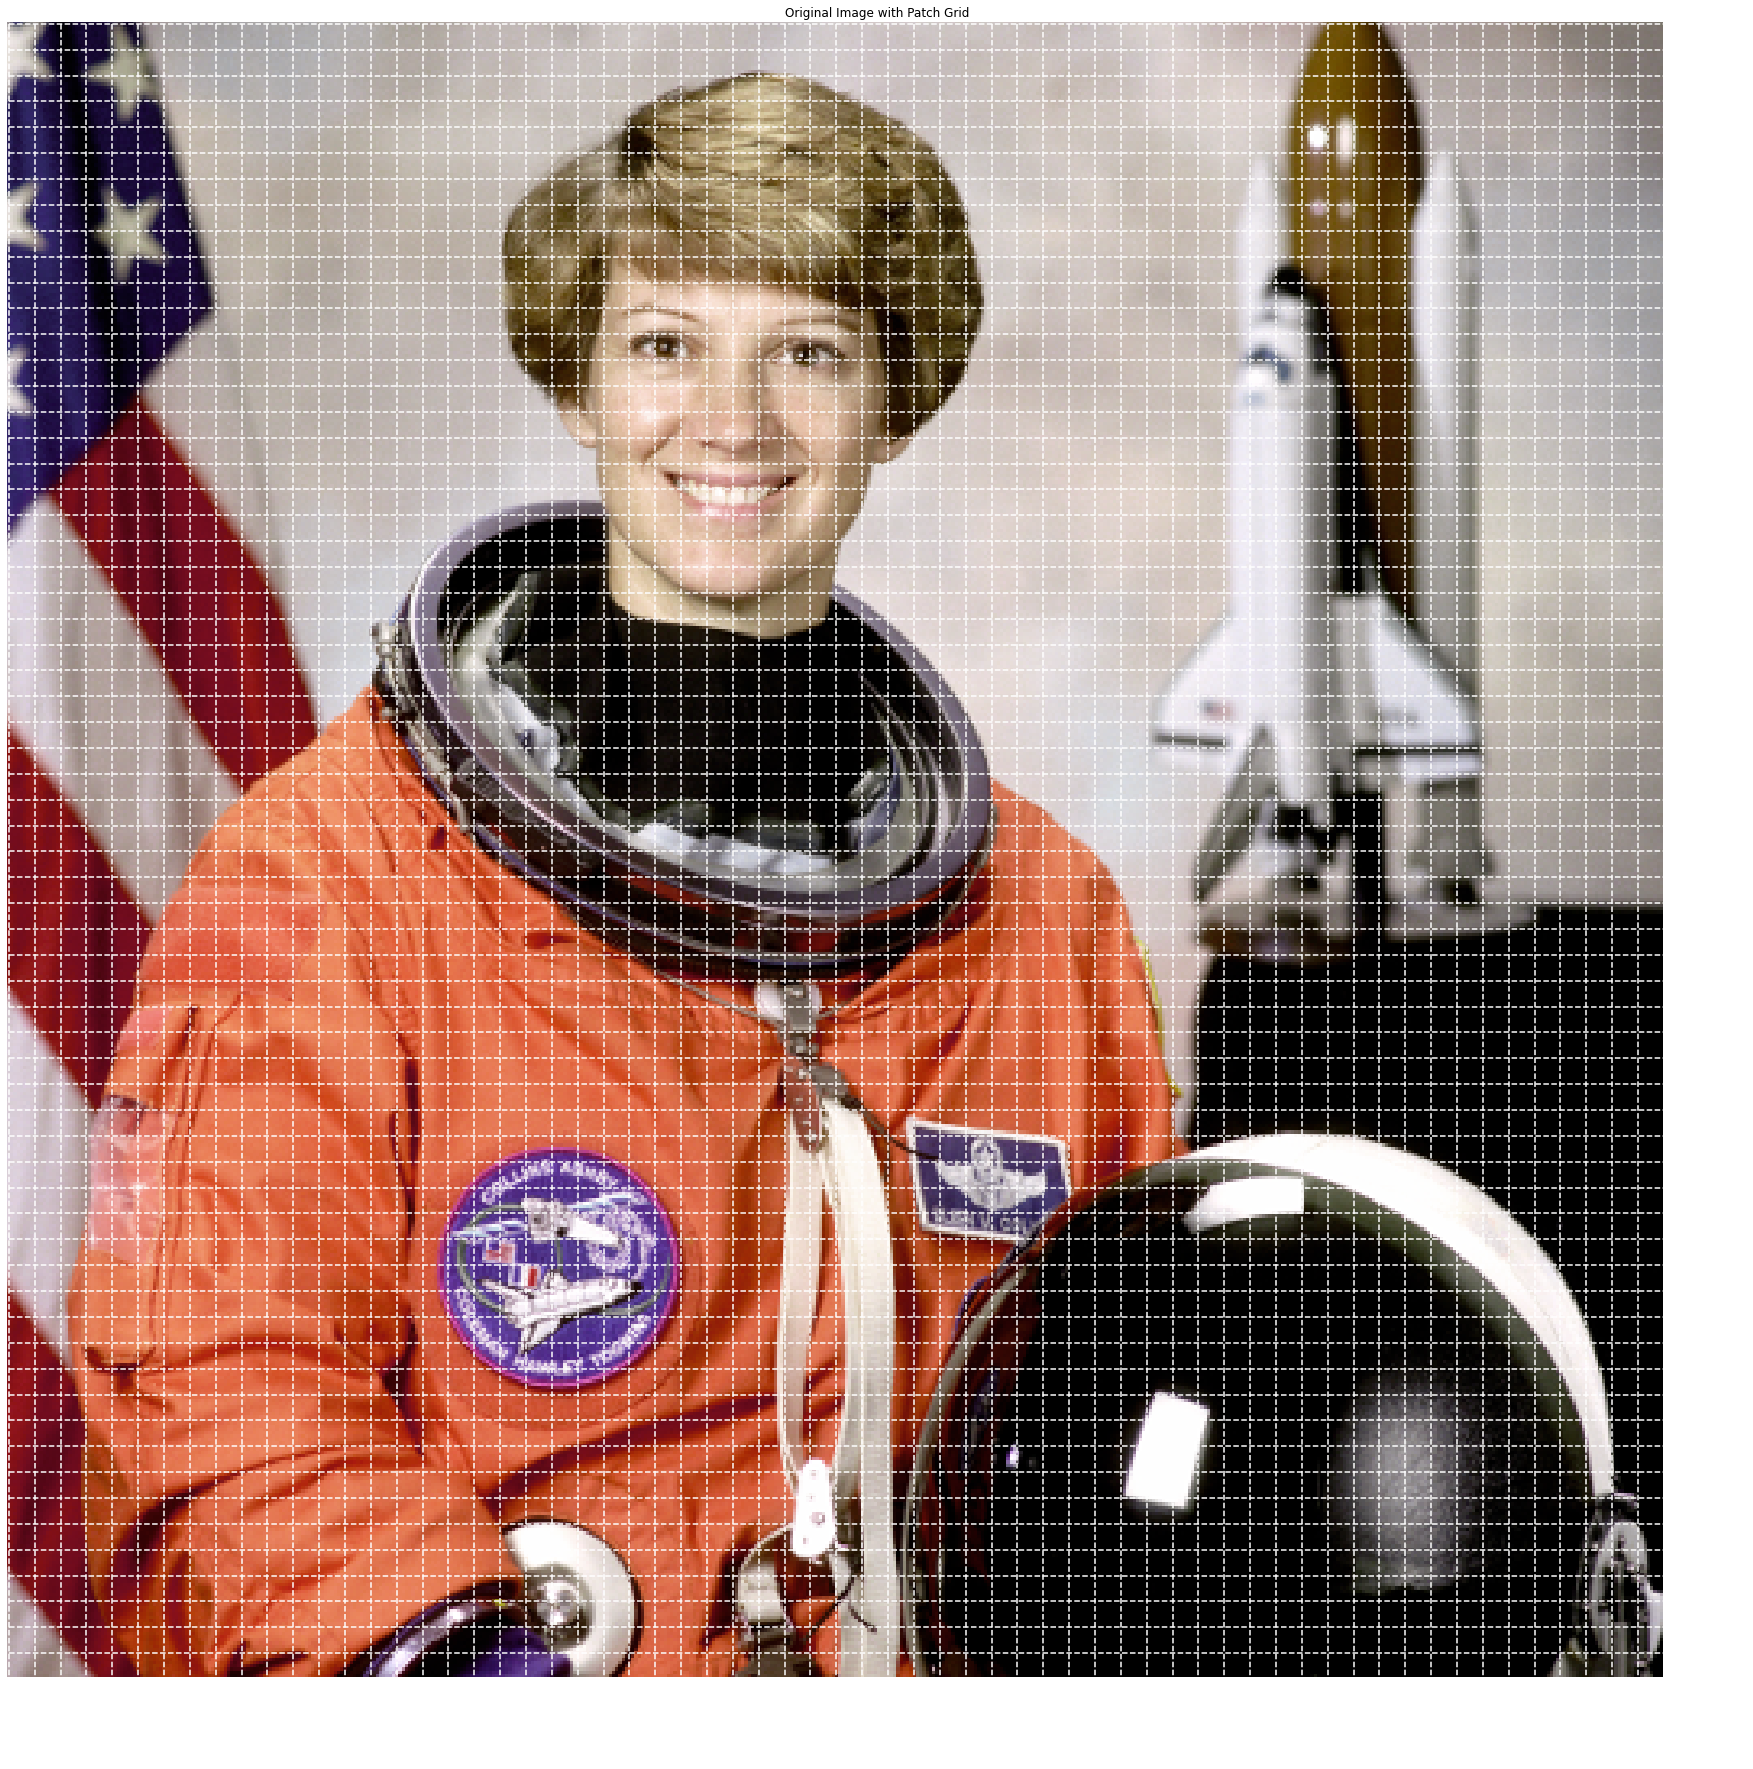

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from sklearn.decomposition import PCA

# Step 1: Load a sample image
image = data.astronaut()  # You can replace this with any image you like

# Step 2: Define the patch size and compute the number of patches
patch_size = (32, 32)  # Height and width of each patch
num_patches_y = image.shape[0] // patch_size[0]
num_patches_x = image.shape[1] // patch_size[1]

# Crop the image to fit an exact number of patches
cropped_image = image[:num_patches_y * patch_size[0], :num_patches_x * patch_size[1], :]

# Step 3: Visualize the original image with patch grids
fig, ax = plt.subplots(figsize=(32, 32))
ax.imshow(cropped_image)
ax.set_title('Original Image with Patch Grid')

# Draw grid lines
for i in range(num_patches_y + 1):
    ax.hlines(i * patch_size[0], 0, cropped_image.shape[1], colors='white', linestyles='dashed')
for j in range(num_patches_x + 1):
    ax.vlines(j * patch_size[1], 0, cropped_image.shape[0], colors='white', linestyles='dashed')
plt.axis('off')
plt.show()

# Step 4: Extract and display individual patches
patches = []
for i in range(num_patches_y):
    for j in range(num_patches_x):
        patch = cropped_image[
            i * patch_size[0] : (i + 1) * patch_size[0],
            j * patch_size[1] : (j + 1) * patch_size[1],
            :
        ]
        patches.append(patch)

fig, axes = plt.subplots(num_patches_y, num_patches_x, figsize=(8, 8))
for idx, patch in enumerate(patches):
    ax = axes[idx // num_patches_x, idx % num_patches_x]
    ax.imshow(patch)
    ax.axis('off')
plt.suptitle('Image Patches')
plt.tight_layout()
plt.show()

# Step 5: Demonstrate the flattening of a patch and embedding
# Select one patch to illustrate
sample_patch = patches[0]
flattened_patch = sample_patch.flatten()

# Show the original patch and its flattened version
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Original patch
axs[0].imshow(sample_patch)
axs[0].set_title('Sample Patch')
axs[0].axis('off')

# Flattened patch representation
axs[1].plot(flattened_patch)
axs[1].set_title('Flattened Patch Vector')
axs[1].set_xlabel('Element Index')
axs[1].set_ylabel('Pixel Value')

plt.tight_layout()
plt.show()

# Simulate embedding the patches
embedding_dim = 128  # Dimension of the embedding space
flattened_patches = np.array([p.flatten() for p in patches])

# Use PCA to reduce dimensionality (simulate linear projection)
pca = PCA(n_components=embedding_dim)
embedded_patches = pca.fit_transform(flattened_patches)

# Visualize the embeddings
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.imshow(embedded_patches.T, aspect='auto', cmap='viridis')
ax.set_title('Patch Embeddings')
ax.set_xlabel('Patch Index')
ax.set_ylabel('Embedding Dimension')
fig.colorbar(cax, ax=ax)
plt.show()
